<a href="https://colab.research.google.com/github/Tasin5541/Cricket-Image-Classifier/blob/master/Cricket_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Tensorflow

In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 44.3MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [ ]:
!curl -s https://course.fast.ai/setup/colab | bash
from fastai.vision import *

bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE html>'


##Fastai

In [ ]:
from fastai.vision import *
import fastai

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

Mounted at /content/gdrive


##In case drive is not loaded properly

In [ ]:
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


##DEFINE CLASSES

In [ ]:
classes = ['Sweep Shot', 'Drive Shot', 'Square Cut', 'Pull Shot', 'Umpire Out', 'Umpire Six', 'wide', 'lbw', 'Century']

In [ ]:
path = Path(root_dir + 'University/Thesis/data_rgb/shots')

##LOADING IMAGES & NORMALIZATION

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train="Train", test="Test", valid_pct=0.2,
 ds_tfms=get_transforms(max_rotate=None), size=(224,224), num_workers=4).normalize(imagenet_stats)

In [ ]:
print(data)

ImageDataBunch;

Train: LabelList (2559 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Square Cut,Square Cut,Square Cut,Square Cut,Square Cut
Path: /content/gdrive/My Drive/University/Thesis/data_rgb/shots;

Valid: LabelList (639 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Century,Pull Shot,Pull Shot,Umpire Six,Drive Shot
Path: /content/gdrive/My Drive/University/Thesis/data_rgb/shots;

Test: LabelList (19 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/gdrive/My Drive/University/Thesis/data_rgb/shots


In [ ]:
print(data.test_ds.items.shape[0])

16


['Century', 'Drive Shot', 'Pull Shot', 'Square Cut', 'Sweep Shot', 'Umpire Out', 'Umpire Six', 'lbw', 'wide']


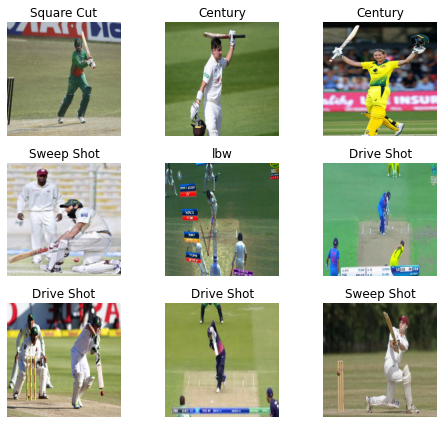

In [ ]:
print(data.classes)
data.show_batch(rows=3, figsize=(7,6))

##CNN

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


##Model

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

##Training

In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.698960,0.872853,0.760563,05:06
1,1.050472,0.554117,0.818466,01:10
2,0.728586,0.396976,0.859155,01:08
3,0.496395,0.308971,0.887324,01:08
4,0.365524,0.294892,0.893584,01:08


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 230, in _feed
    close()
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


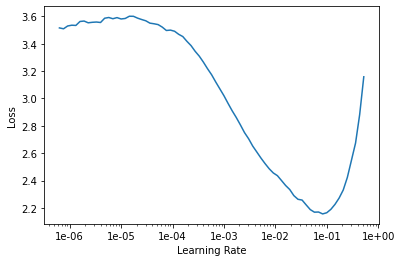

In [ ]:
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


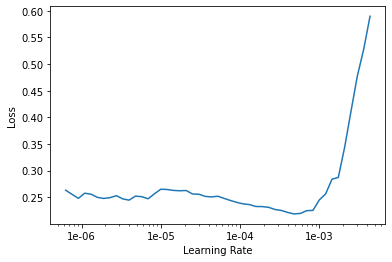

In [ ]:
learn.save('stage-1')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.load('stage-1');

In [ ]:
learn.fit_one_cycle(5, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.234024,0.205172,0.932707,01:10
1,0.198823,0.184838,0.932707,01:10
2,0.141151,0.181398,0.948357,01:11
3,0.095187,0.130640,0.962441,01:11
4,0.069350,0.116388,0.965571,01:10


In [ ]:
learn.save('stage-2')

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1, max_lr=slice(2e-5,2e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.047896,0.112727,0.968701,01:10


In [ ]:
learn.save('stage-2')

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.034418,0.102054,0.967136,01:10


In [ ]:
learn.save('stage-2')

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(0.5e-5,0.5e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.048903,0.110168,0.965571,01:09
1,0.037237,0.119458,0.962441,01:09


In [ ]:
learn.save('stage-2')

In [ ]:
learn.unfreeze()

In [ ]:
learn.load('stage-2');

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

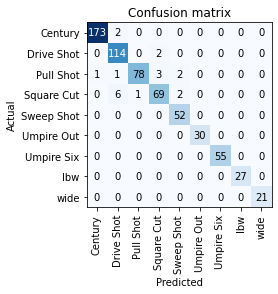

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
interp.most_confused()

[('Square Cut', 'Drive Shot', 6),
 ('Pull Shot', 'Square Cut', 3),
 ('Century', 'Drive Shot', 2),
 ('Drive Shot', 'Square Cut', 2),
 ('Pull Shot', 'Sweep Shot', 2),
 ('Square Cut', 'Sweep Shot', 2),
 ('Pull Shot', 'Century', 1),
 ('Pull Shot', 'Drive Shot', 1),
 ('Square Cut', 'Pull Shot', 1)]

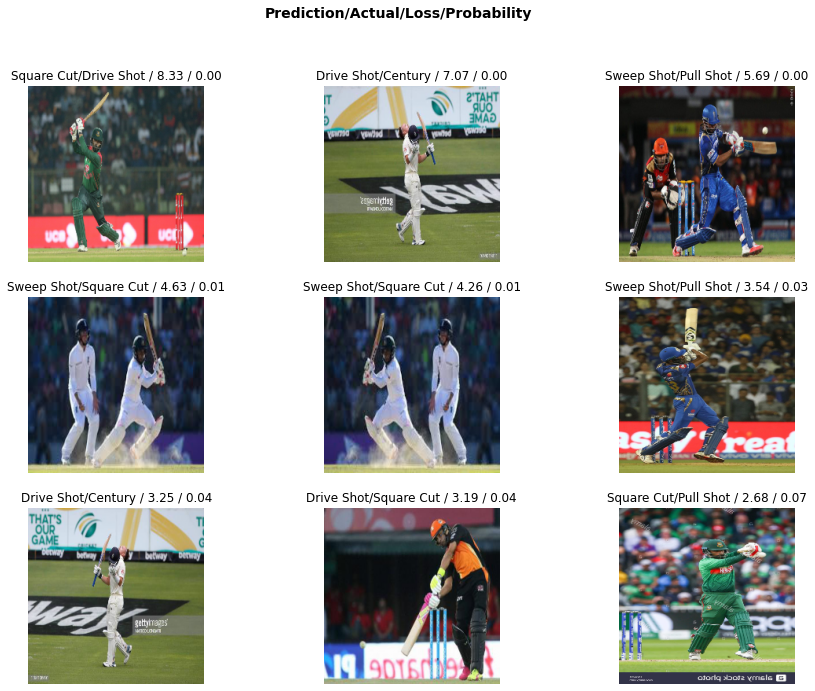

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
predictions, targs = learn.get_preds(DatasetType.Test)
labels = np.argmax(predictions, 1)

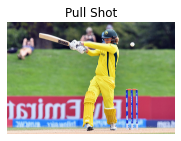

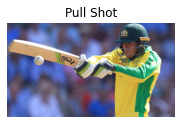

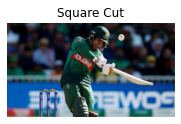

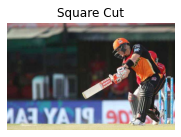

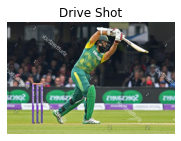

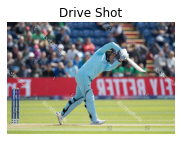

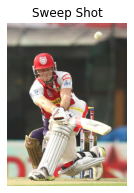

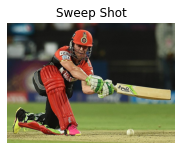

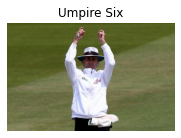

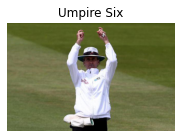

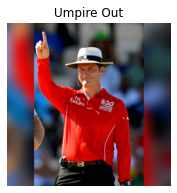

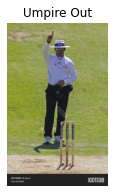

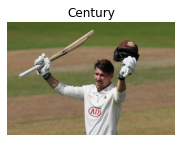

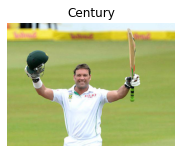

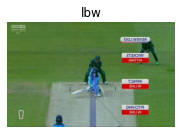

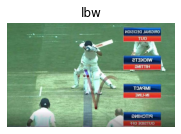

In [ ]:
test_predictions_direct = [data.classes[int(x)] for x in labels]

for i in range(len(test_predictions_direct)):
  img = open_image(data.test_ds.items[i])
  img.show(title=test_predictions_direct[i])

##SAVE MODEL

In [ ]:
learn.export()

##PREDICTION

In [ ]:
defaults.device = torch.device('cuda')

In [ ]:
learn = load_learner(path)

In [ ]:
y = data.valid_ds.y.items
preds,y_hat,losses = learn.get_preds(with_loss=True)

from sklearn.metrics import classification_report
y_hat = np.argmax(preds,axis=1)
print(classification_report(y, y_hat, target_names=data.valid_ds.y.classes))

              precision    recall  f1-score   support

     Century       0.99      0.99      0.99       175
  Drive Shot       0.93      0.98      0.95       116
   Pull Shot       0.99      0.92      0.95        85
  Square Cut       0.93      0.88      0.91        78
  Sweep Shot       0.93      1.00      0.96        52
  Umpire Out       1.00      1.00      1.00        30
  Umpire Six       1.00      1.00      1.00        55
         lbw       1.00      1.00      1.00        27
        wide       1.00      1.00      1.00        21

    accuracy                           0.97       639
   macro avg       0.97      0.97      0.97       639
weighted avg       0.97      0.97      0.97       639



In [ ]:
print(preds)
print(y_hat.shape)

tensor([3.1216e-08, 1.2659e-06, 4.0457e-07, 1.5882e-05, 3.7529e-07, 7.6396e-06,
        5.7448e-08, 9.9997e-01, 1.3663e-06])
torch.Size([639])


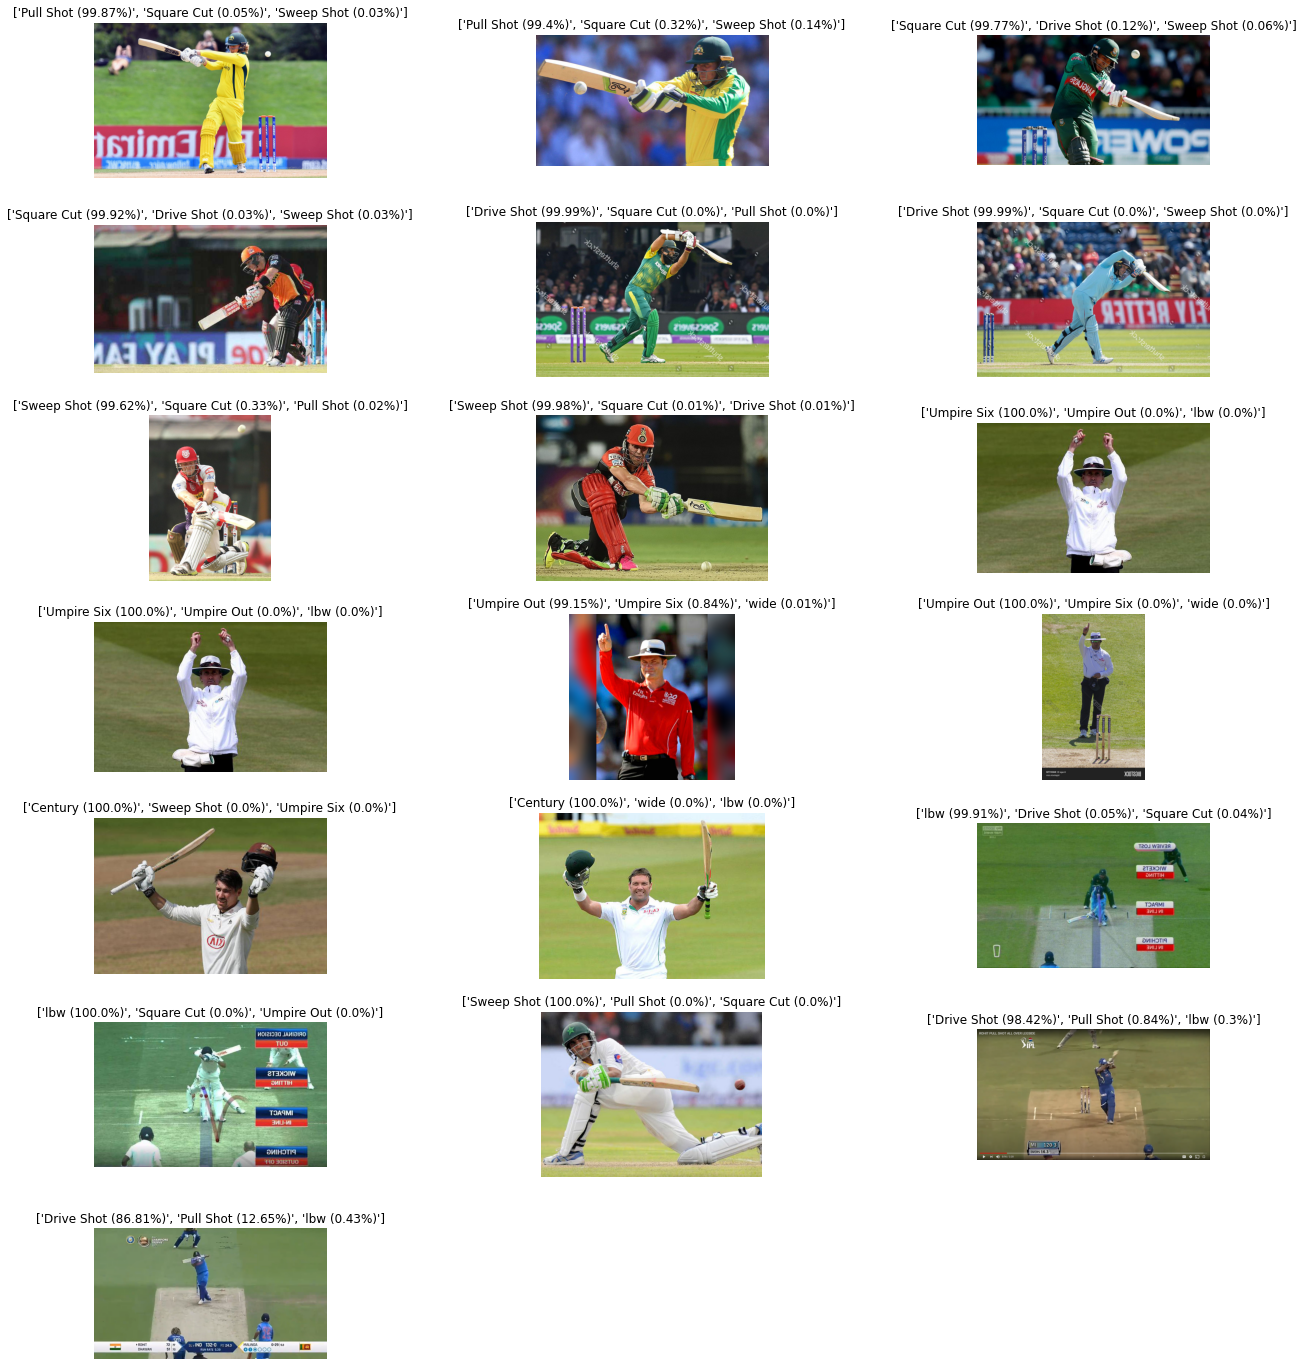

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import math 

plt.figure(figsize=[20,25])
plt.subplots_adjust(wspace = 0.9)
k=0

for i in data.test_ds.items:
  img = open_image(i)

  # Get best first prediction
  pred_1_class, indice, preds = learn.predict(img)

  # Get all best predictions
  preds_sorted, idxs = preds.sort(descending=True)

  # Get best 3 predictions - classes
  pred_2_class = learn.data.classes[idxs[1]]
  pred_3_class = learn.data.classes[idxs[2]]
    
  # Get best 3 predictions - probabilities
  pred_1_prob = np.round(100*preds_sorted[0].item(),2)
  pred_2_prob = np.round(100*preds_sorted[1].item(),2)
  pred_3_prob = np.round(100*preds_sorted[2].item(),2)
  preds_best3 = [f'{pred_1_class} ({pred_1_prob}%)', f'{pred_2_class} ({pred_2_prob}%)', f'{pred_3_class} ({pred_3_prob}%)']

  axarr = plt.subplot(math.ceil(data.test_ds.items.shape[0]/3),3,k+1)
  k = k+1
  axarr.axis('off')
  img1 = Image.open(i)
  plt.title(preds_best3)
  imgplot = plt.imshow(img1)

  #img.show(title=preds_best3)
plt.show()

##Video

In [ ]:
t = torch.tensor(np.ascontiguousarray(np.flip(frame, 2)).transpose(2,0,1)).float()/255
img = Image(t) # fastai.vision.Image, not PIL.Image
p = learn.predict(img)

##HEATMAP

In [ ]:
x,y = data.valid_ds[5]

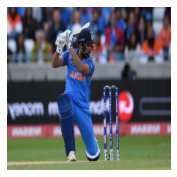

In [ ]:
x.show()

In [ ]:
learn.predict(x)

(Category tensor(1),
 tensor(1),
 tensor([7.3577e-06, 9.8400e-01, 1.4983e-02, 9.0698e-04, 2.0194e-05, 4.2347e-05,
         1.9412e-05, 5.6403e-07, 2.2701e-05]))

In [ ]:
m = learn.model.eval()

In [ ]:
xb,_ = data.one_item(x)
xb_im = Image(data.denorm(xb)[0])
xb = xb.cuda()

In [ ]:
from fastai.callbacks.hooks import *

In [ ]:
def hooked_backward(cat=y):
    with hook_output(m[0]) as hook_a: 
        with hook_output(m[0], grad=True) as hook_g:
            preds = m(xb)
            preds[0,int(cat)].backward()
    return hook_a,hook_g

In [ ]:
hook_a,hook_g = hooked_backward()

In [ ]:
acts  = hook_a.stored[0].cpu()
acts.shape

torch.Size([2048, 7, 7])

In [ ]:
avg_acts = acts.mean(0)
avg_acts.shape

torch.Size([7, 7])

In [ ]:
def show_heatmap(hm):
    _,ax = plt.subplots()
    xb_im.show(ax)
    ax.imshow(hm, alpha=0.6, extent=(0,224,224,0),
              interpolation='bilinear', cmap='magma');

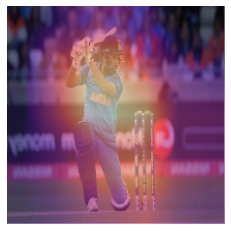

In [ ]:
show_heatmap(avg_acts)